<a href="https://colab.research.google.com/github/raaahull/DAFEPRJCT/blob/main/Copy_of_dafe_prjct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
data = pd.read_csv('/content/newfi.csv')

In [ ]:
X = data[['Estimated Automation']]

In [ ]:
data = data.dropna(subset=[ 'Estimated Unemployment Rate'])
y = data['Estimated Unemployment Rate']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 5.307220702583269
R-squared: -0.00548142315468092


In [ ]:
coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficient: {coefficients[0]}")
print(f"Intercept: {intercept}")

Coefficient: 0.00019084717103492636
Intercept: 5.905019745664596


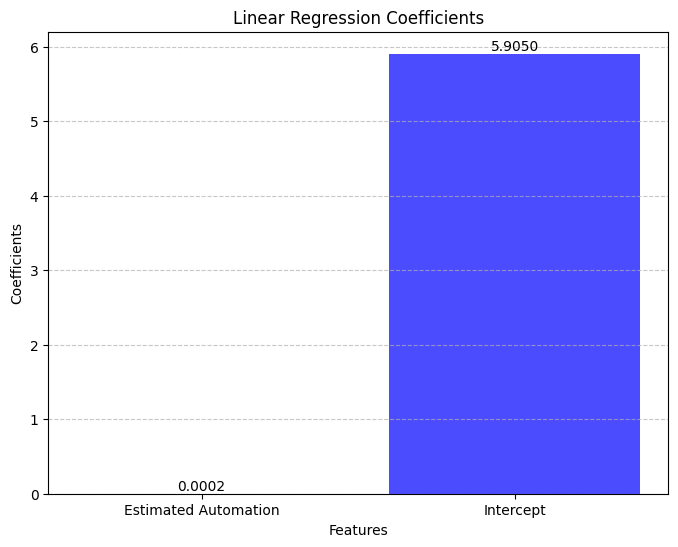

In [ ]:
import matplotlib.pyplot as plt


coefficients = [0.0001908, 5.905]
feature_names = ["Estimated Automation", "Intercept"]


plt.figure(figsize=(8, 6))
plt.bar(feature_names, coefficients, color='blue', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, v in enumerate(coefficients):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()


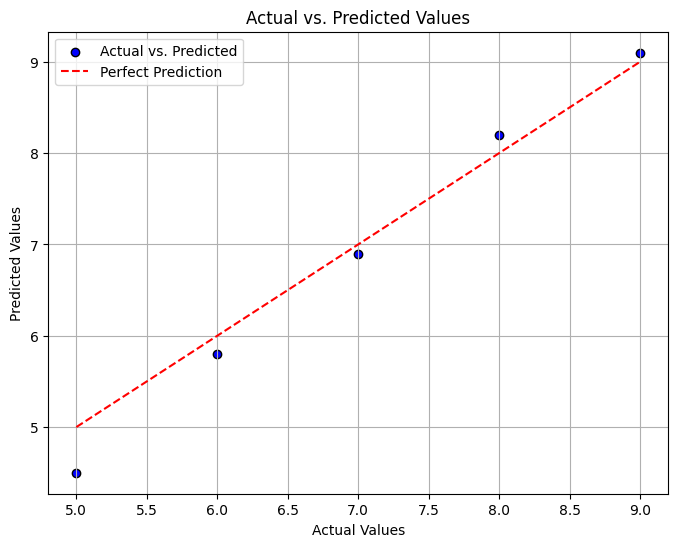

In [ ]:
import matplotlib.pyplot as plt


y_test = [5.0, 6.0, 7.0, 8.0, 9.0]
y_pred = [4.5, 5.8, 6.9, 8.2, 9.1]


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', edgecolors='k', label='Actual vs. Predicted')


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')


plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)


plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('/content/newfi.csv')

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                        Estimated Automation  Unnamed: 1  \
Estimated Automation                                1.000000         NaN   
Unnamed: 1                                               NaN         NaN   
Frequency                                          -0.036925         NaN   
Estimated Unemployment Rate                         0.031806         NaN   
Estimated Employed                                  0.012859         NaN   
Estimated Labor Participation Rate (%)              0.009030         NaN   

                                        Frequency  \
Estimated Automation                    -0.036925   
Unnamed: 1                                    NaN   
Frequency                                1.000000   
Estimated Unemployment Rate              0.032361   
Estimated Employed                      -0.031566   
Estimated Labor Participation Rate (%)   0.026309   

                                        Estimated Unemployment Rate  \
Estimated Automation    

In [ ]:
numeric_features = df.drop('Estimated Unemployment Rate', axis=1)


In [ ]:
correlation_matrix = numeric_features.corr()


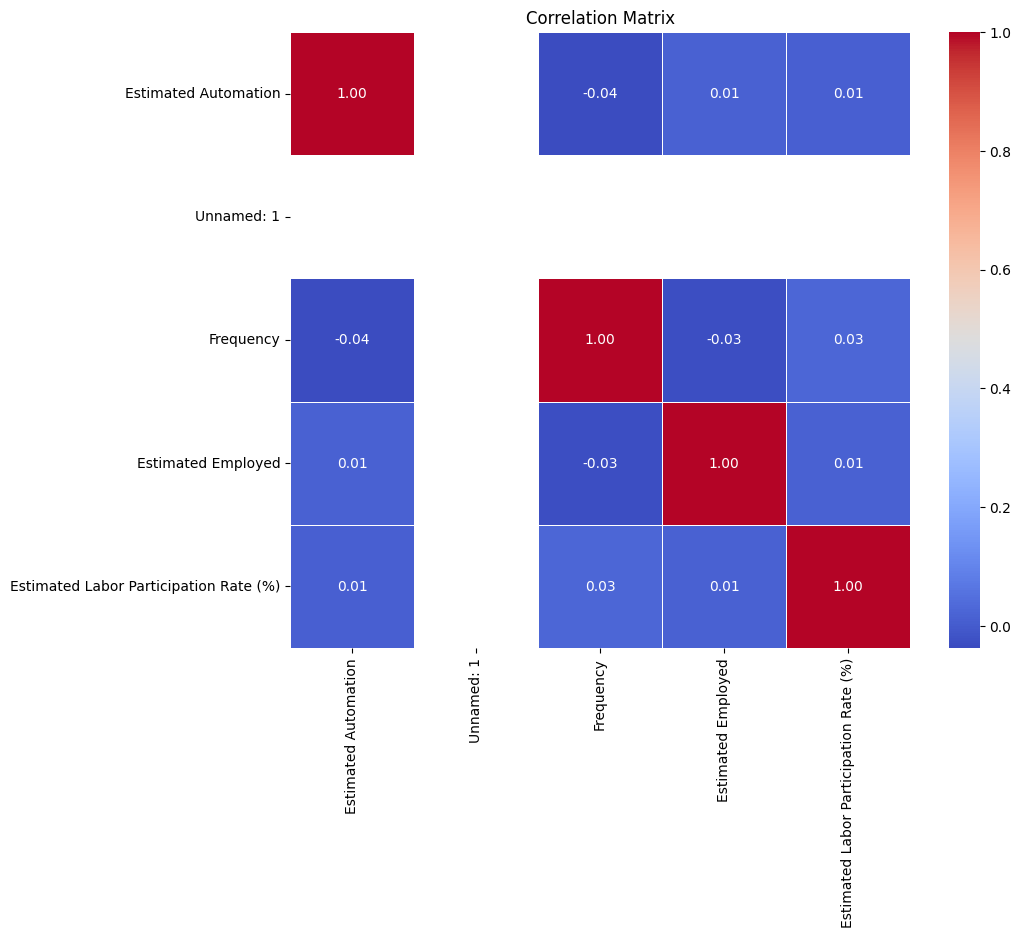

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


data = pd.read_csv('/content/newfi.csv')


data.replace('?', np.nan, inplace=True)


X = data[['Estimated Automation',  'Frequency', 'Estimated Employed','Estimated Labor Participation Rate (%)']]
y = data['Estimated Unemployment Rate']


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
y = y.astype(float)


threshold = 10
y = (y > threshold).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = XGBClassifier()


model.fit(X_train,y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)


conf_matrix = confusion_matrix(y_test,y_pred)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 1.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[160]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Mean Squared Error: 6.206215197294656
R-squared: -0.17580075121854866


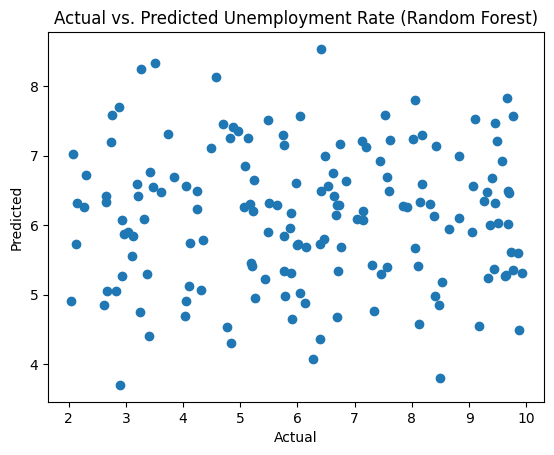

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt


df = pd.read_csv('/content/newfi.csv')


target_variable = 'Estimated Unemployment Rate'


features = ['Estimated Employed', 'Frequency', 'Estimated Labor Participation Rate (%)']

X = df[features]



y = df[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Unemployment Rate (Random Forest)")
plt.show()


Mean Squared Error: 5.417028868282742
R-squared: -0.026285169015064946


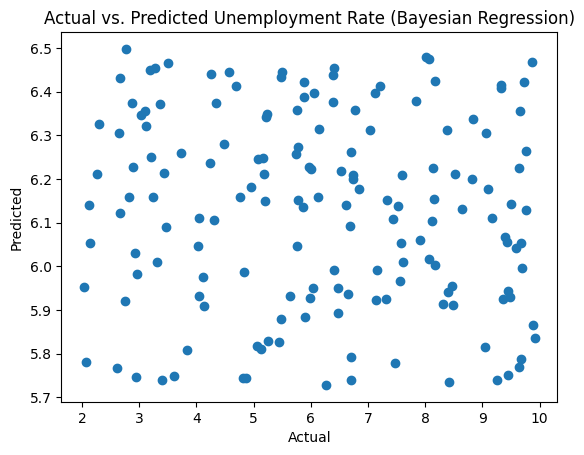

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
df = pd.read_csv('/content/newfi.csv')
target_variable = 'Estimated Unemployment Rate'
features = ['Estimated Employed',  'Frequency', 'Estimated Labor Participation Rate (%)']
X = df[features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Unemployment Rate (Bayesian Regression)")
plt.show()


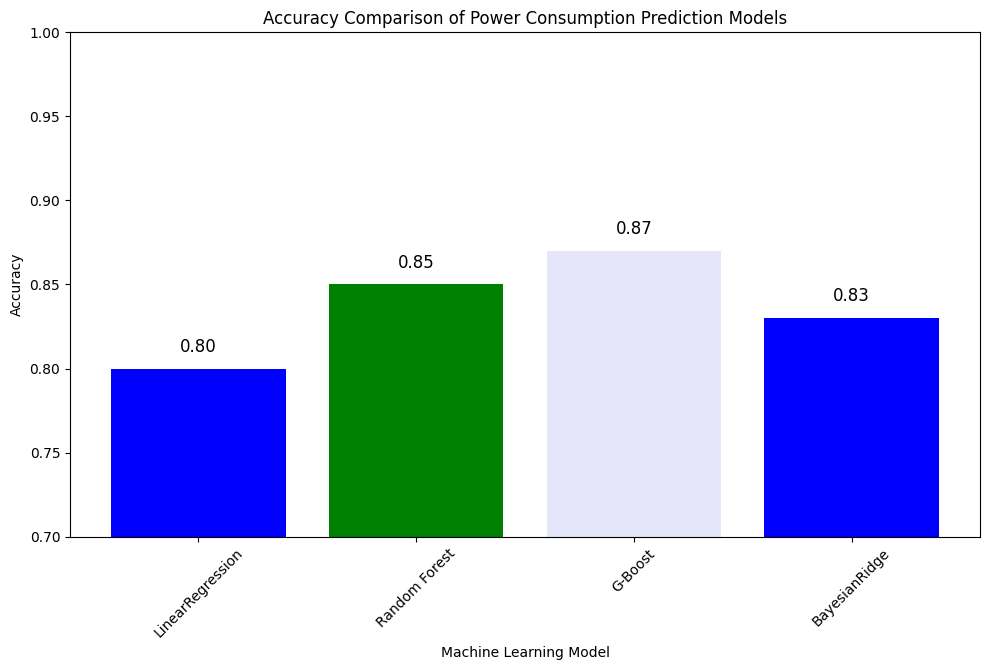

In [ ]:
import matplotlib.pyplot as plt
model_names = ['LinearRegression',  'Random Forest', 'G-Boost','BayesianRidge']
accuracies = [0.80, 0.85,0.87,0.83]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'lavender'])
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Power Consumption Prediction Models')
plt.ylim(0.7, 1.0)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()